In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, L_BFGS, Adam
from neural_stylization.util.build_callback import build_callback

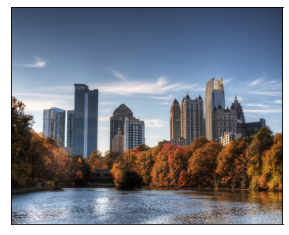

In [3]:
content = io.imread('img/content/piedmont-park.jpg')
content = T.resize(content, (400, 500), preserve_range=True).astype('uint8')
ax = plt.imshow(content)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

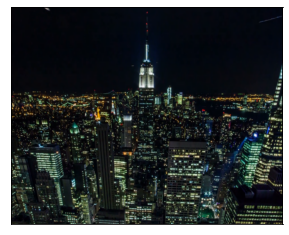

In [4]:
style = io.imread('img/content/new-york.png')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

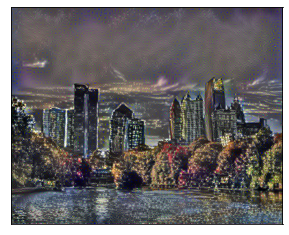

100%|██████████| 50/50 [03:27<00:00,  4.15s/it]


In [5]:
output = Stylizer('block3_conv2', content_weight=1, style_weight=100)(
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=15),
    iterations=50,
    callback=build_callback('build/transfer/atlanta/piedmont-park')
)
io.imsave('img/transfer/piedmont-park.png', output)